In [2]:
# Import Package
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax8'
dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_human = MultiDefectDetectionDataset(data_dir=root, split='Stablehuman')
bbox_label_names = ('111', 'dot','100')
# DataSet Statistics
print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_human))
print('type of defects: ', bbox_label_names)

total number of training images:  1200
total number of test images:  3
type of defects:  ('111', 'dot', '100')


In [3]:
# Faster R-CNN model

use_gpu = False
# Higher NMS
proposal_params = {'min_size': 8,'nms_thresh':0.4}
model = FasterRCNNVGG16(n_fg_class=3,
                        pretrained_model='modelResults/snapshot_model_244000_Shufulle.npz',
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 4,8,16], anchor_scales=[1, 4, 8, 16], min_size=1024,
                        max_size=1024, proposal_creator_params=proposal_params)

model.score_thresh = 0.25

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(56, 56)
center =  [ 27.30063862  29.74769461]
angle of rotation =  0.0088468360426
axes =  [ 22.96119733  21.36962645]
(54, 55)
center =  [ 31.18742236  29.3497428 ]
angle of rotation =  0.127559935173
axes =  [ 23.21523817  21.77162579]
(61, 55)
center =  [ 21.58002519  26.0252498 ]
angle of rotation =  0.315884649522
axes =  [        nan  12.9662898]
(54, 57)


/Users/mingrenshen/PycharmProjects/multitype-defect-detection/utils/FitEllipse.py:37: RuntimeWarning: invalid value encountered in sqrt
  res1 = np.sqrt(up / down1)


center =  [ 27.19924453  30.00934741]
angle of rotation =  -0.7059146728
axes =  [  6.73458106  25.07331145]
(38, 37)
center =  [ 17.26050122  19.78416427]
angle of rotation =  0.572700951073
axes =  [ 13.55897938  12.92667895]
(37, 37)
center =  [ 17.0955101   15.76900804]
angle of rotation =  -0.154003864728
axes =  [        nan  3.49462083]
(52, 50)
center =  [ 25.21891403  24.12796171]
angle of rotation =  -0.771029097178
axes =  [ 22.15401693   9.78053451]
(45, 55)
center =  [ 21.81073477  26.86428899]
angle of rotation =  0.530258500373
axes =  [  8.90959867  19.20307101]
(41, 42)
center =  [ 20.70528812  19.24824477]
angle of rotation =  0.776955957426
axes =  [ 18.68096827  15.671129  ]
(56, 56)


/Users/mingrenshen/PycharmProjects/multitype-defect-detection/utils/FitEllipse.py:38: RuntimeWarning: invalid value encountered in sqrt
  res2 = np.sqrt(up / down2)


center =  [ 23.0587948   20.12732956]
angle of rotation =  0.215308903065
axes =  [ 6.24279488         nan]
(48, 48)
center =  [ 27.15475358  20.15695016]
angle of rotation =  -0.70291324052
axes =  [ 20.19686649  29.24852662]
(44, 44)
center =  [ 25.20775948  19.71837571]
angle of rotation =  0.300511439577
axes =  [ 16.05441748  19.56924461]
(83, 65)
center =  [ 31.16658797  33.58246226]
angle of rotation =  0.236763551617
axes =  [        nan  6.85201406]
(43, 41)
center =  [ 20.24306139  19.41107121]
angle of rotation =  0.712785918505
axes =  [ 16.60854647   5.919771  ]
(96, 93)
center =  [ 43.80828224  42.44723911]
angle of rotation =  -0.0509427021374
axes =  [ 9.34434358         nan]
(38, 40)
center =  [ 12.50731545  13.19244264]
angle of rotation =  0.78273375683
axes =  [ 7.73696739         nan]
(39, 38)
center =  [ 21.15196157  21.13185605]
angle of rotation =  -0.421591566765
axes =  [ 10.24656656  13.58437987]
(38, 38)
center =  [ 17.49930843  18.35084801]
angle of rotatio

/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(39, 41)
center =  [ 20.6755721   16.88937095]
angle of rotation =  -0.146773040776
axes =  [ 18.03907553  21.80249264]


/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/Users/mingrenshen/anaconda2/envs/defectDection/lib/python3.5/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


(61, 62)
center =  [ 31.69427567  29.50791308]
angle of rotation =  -0.0595834715256
axes =  [ 11.98636124          nan]
(90, 93)
center =  [ 25.23793497  65.5501353 ]
angle of rotation =  -0.308764290428
axes =  [ 16.11694042          nan]
(41, 65)


/Users/mingrenshen/PycharmProjects/multitype-defect-detection/utils/FitEllipse.py:38: RuntimeWarning: invalid value encountered in sqrt
  res2 = np.sqrt(up / down2)


center =  [ 19.08517698  31.90740181]
angle of rotation =  0.0166684364928
axes =  [ 24.01461751  29.75287466]
(97, 93)
center =  [ 47.50902804  48.8650027 ]
angle of rotation =  0.166757469727
axes =  [ 45.25750713  40.12592575]
(139, 45)
center =  [ 70.37117855  21.7278823 ]
angle of rotation =  -0.0680287316475
axes =  [ 55.73825476  10.92920446]
(50, 49)
center =  [ 25.66656579  25.65918226]
angle of rotation =  0.226985133491
axes =  [ 23.43718545  26.83552835]
(104, 46)
center =  [ 56.63309574  16.08526828]
angle of rotation =  0.159705240997
axes =  [ 48.9437523   24.36629861]
Done


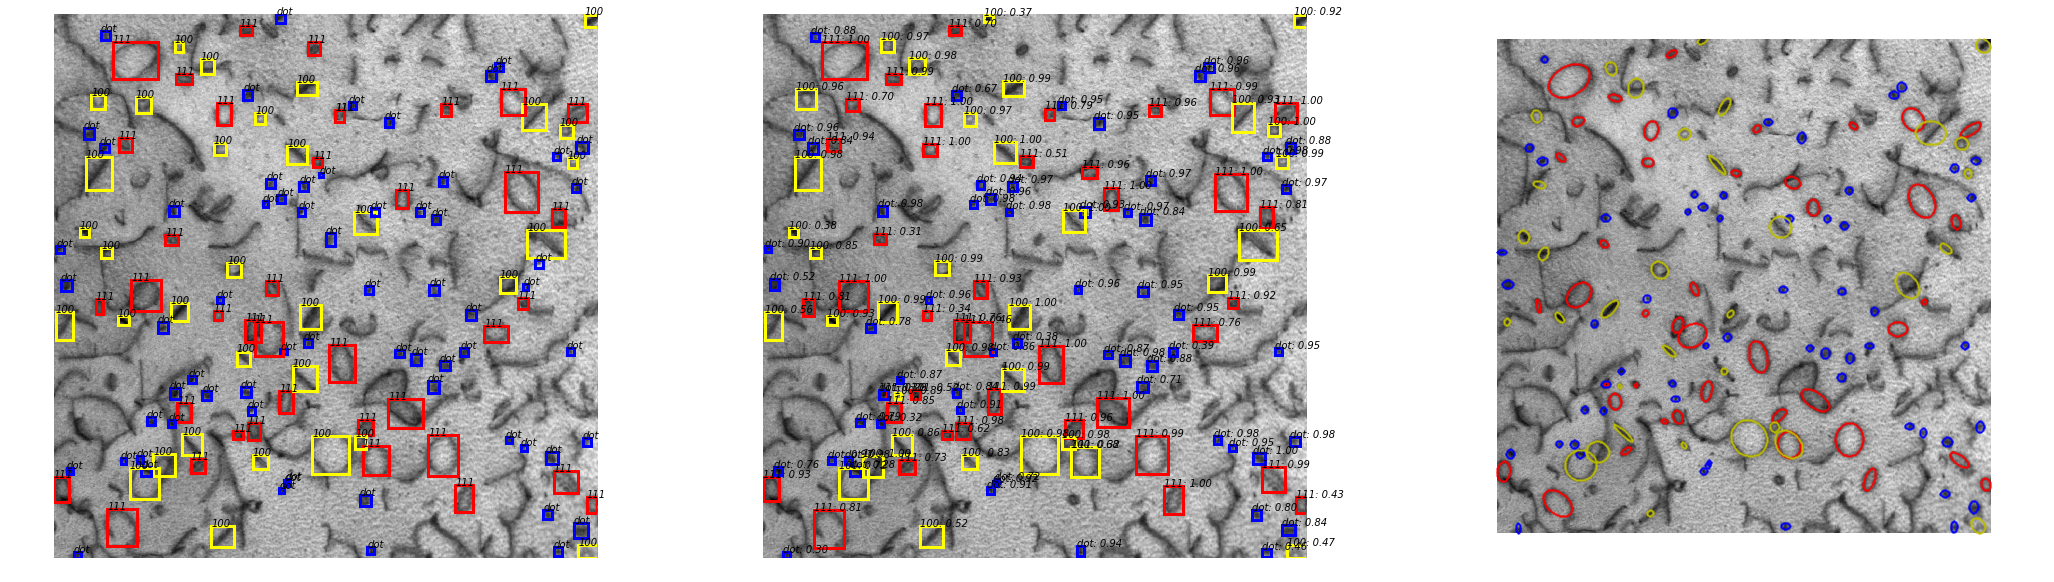

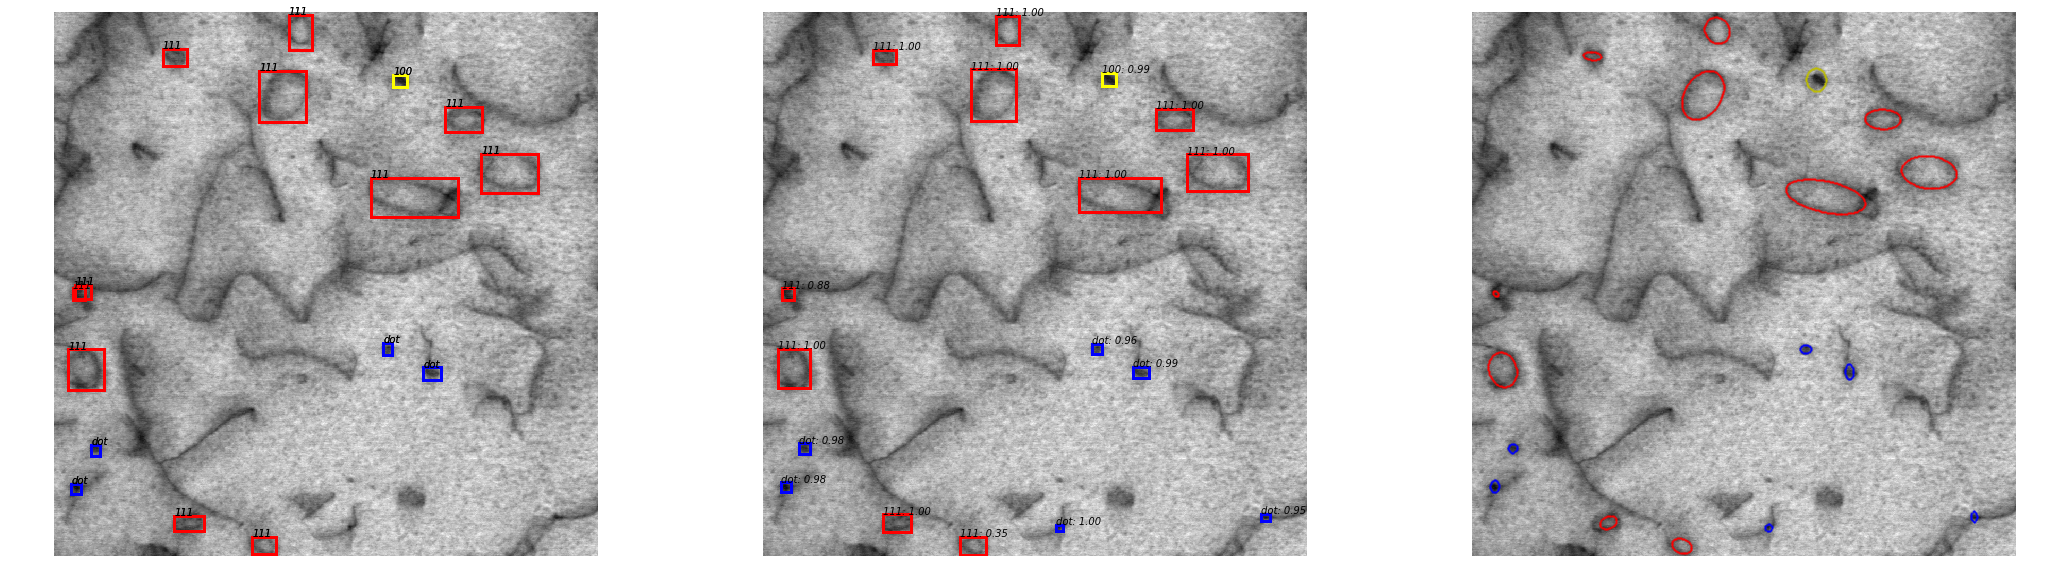

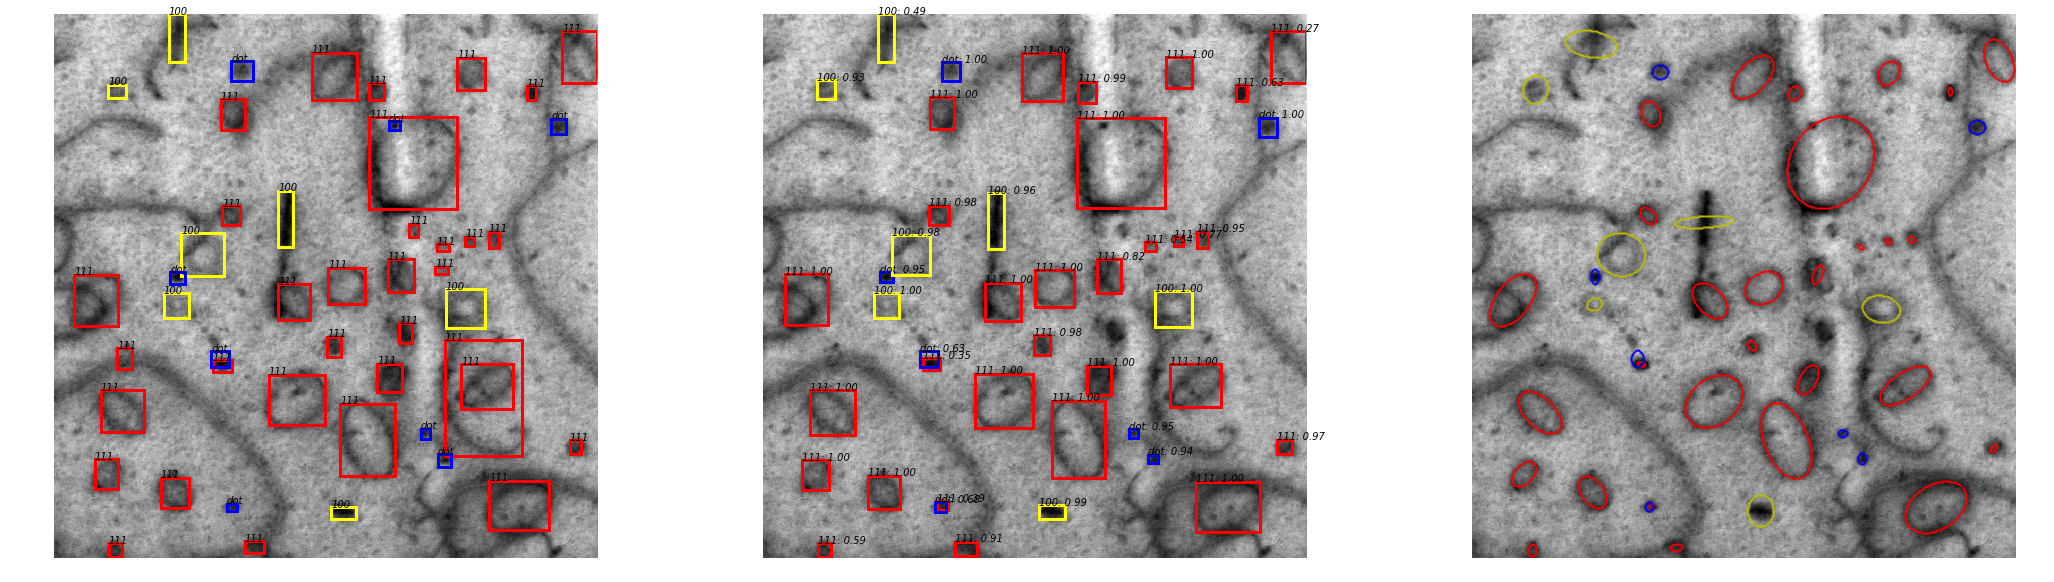

In [4]:
# import functions
from utils.postProcessing import img_ellipse_fitting_3kinds_Fig3

i = 1
for imgdata in dataset_human:
    # Figure Setting
    fig = plt.figure(figsize=(36,10))
    plt.axis('off')
    img, bbox, labels = imgdata
    fname = "img" + str(i)
    # Ground Truth
    ax1 = fig.add_subplot(1, 3, 1)
    visualization.vis_bbox(img, bbox, labels, label_names=bbox_label_names, ax=ax1)
    
    # Prediction of image
    # Predicted BBoxes
    ax2 = fig.add_subplot(1, 3, 2)
    bboxes, labels, scores = model.predict([img])
    # plot prediction
    visualization.vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax2)
    
    # Fitting of images
    ax3 = fig.add_subplot(1, 3, 3)
    img_ellipse_fitting_3kinds_Fig3(img, bboxes[0], labels[0],ax=ax3)
    
    
    fig.savefig(fname,dpi=300,bbox_inches='tight')
    i = i + 1

print("Done")